In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from utils import load_data, load_json, retrieve_docs, precision_recall
import numpy as np
import os
import matplotlib.pyplot as plt
import json

In [3]:
def cos_distance(P_k, g_j, q):
    q_k = P_k.T @ q
    return q_k.T @ g_j / (np.linalg.norm(q_k) * np.linalg.norm(g_j))

def vector_space_cos(a_j, q):
    return q.T @ a_j / (np.linalg.norm(q) * np.linalg.norm(a_j))

In [4]:
data_path = r"../data/text-mining-medline_stemmed.mat"
data = load_data(data_path)
# term document matrix
A = data["A"].A
q = data["q"].A
normalized_A  = A.copy()
normalized_A = normalize(normalized_A, axis=0, norm="l2")
print(np.linalg.norm(normalized_A[:, 2]))

0.9999999999999999


In [5]:
kmeans = KMeans(n_clusters=50, random_state=0, n_init="auto").fit(normalized_A.T)
labels = kmeans.labels_
C_k = kmeans.cluster_centers_
C_k = C_k.T

In [8]:
#write clusters to json file 
# clusters = {}
# for i, label in enumerate(labels):
#     if label not in clusters:
#         clusters[int(label)] = []
#     clusters[int(label)].append(i + 1)
# #sort the dictionnary by key

# clusters = dict(sorted(clusters.items(), key=lambda item: item[0]))
# with open("../data/clusters.json", "w") as file:
#     json.dump(clusters, file, indent=4)


In [6]:
P_k, R = np.linalg.qr(C_k)
G_k = P_k.T @ normalized_A

m_q, n_q = q.shape
m_g, n_g = G_k.shape
distance_matrix = np.zeros((n_q, n_g))
vector_space_distance_matrix = np.zeros((n_q, n_g))
for i in range(n_q):
    for j in range(n_g):
        cos_dist = cos_distance(P_k, G_k[:, j], q[:, i])
        vector_space_distance = vector_space_cos(normalized_A[:,j], q[:, i])
        distance_matrix[i][j] = cos_dist
        vector_space_distance_matrix[i][j] = vector_space_distance


In [7]:
q_9_distances = distance_matrix[8]
q_9_distances_vector_space = vector_space_distance_matrix[8]

In [8]:
json_dict = load_json(r"../data\med\MED.json")

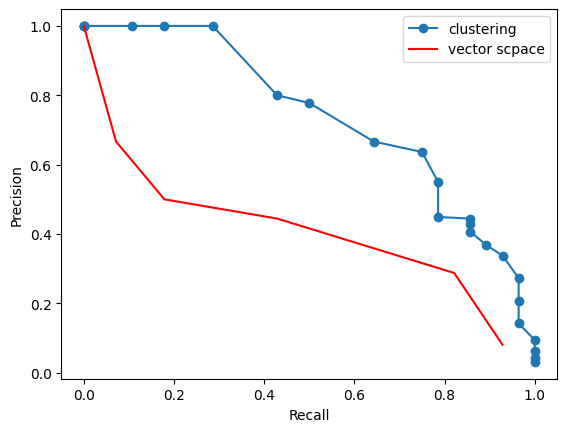

In [9]:
#try to plot precision and recall for query 9
tol = np.linspace(.0, 1.0, 25)
precision = []
recall = []
vs_precision = []
vs_recall = []
for t in tol:
    retrieved_docs = retrieve_docs(q_9_distances, t)
    vs_retrieved_docs = retrieve_docs(q_9_distances_vector_space, t)
    precision_value, recall_value = precision_recall(json_dict, "9", retrieved_docs)
    vs_precision_value, vs_recall_value = precision_recall(json_dict, "9", vs_retrieved_docs)
    precision.append(precision_value)
    recall.append(recall_value)
    vs_precision.append(vs_precision_value)
    vs_recall.append(vs_recall_value)

plt.plot(recall, precision, "o-", label="clustering")
plt.plot(vs_recall, vs_precision, "r", label="vector scpace")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

            